### MTH9897 HW1

Jiang, Yumin \
Lin, Krystal \
Zhu, Yiqing 

In [1]:
from t_spread_curve import SpreadCurve
from strategy_backtest import Strategy

In [2]:
tickers = ['AAPL', 'AMZN', 'IBM', 'MSFT', 'WMT']
x_var = 'tmt'
# t_spread ~ a + b*log(tmt) + c*log(1 + tmt) + d*coupon
features = [f'log_{x_var}', x_var, 'coupon']
spread_curve = SpreadCurve(tickers, features, 't_spread',x_var)

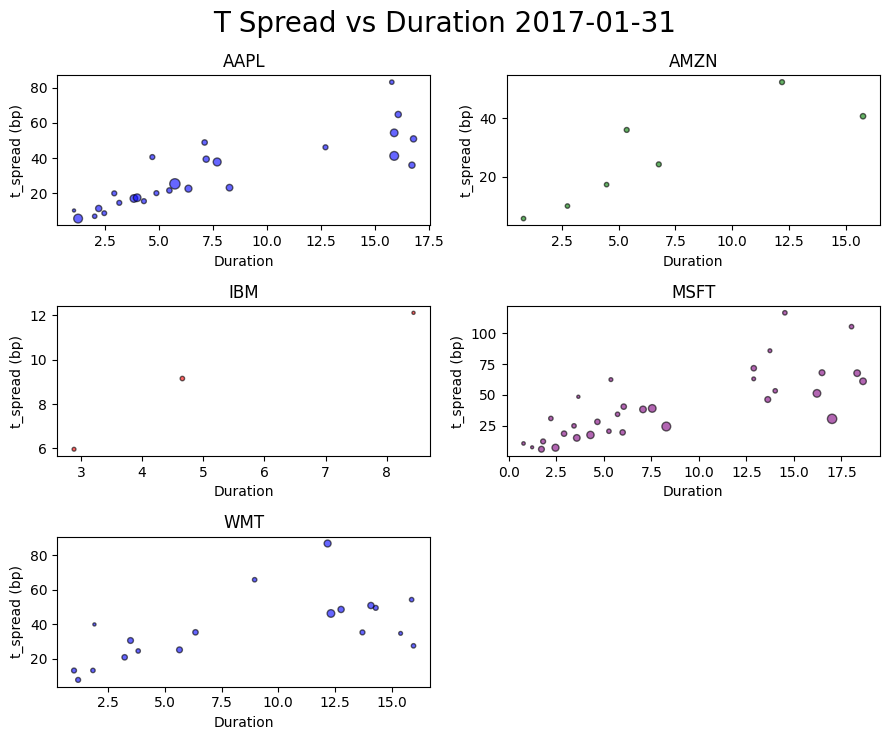

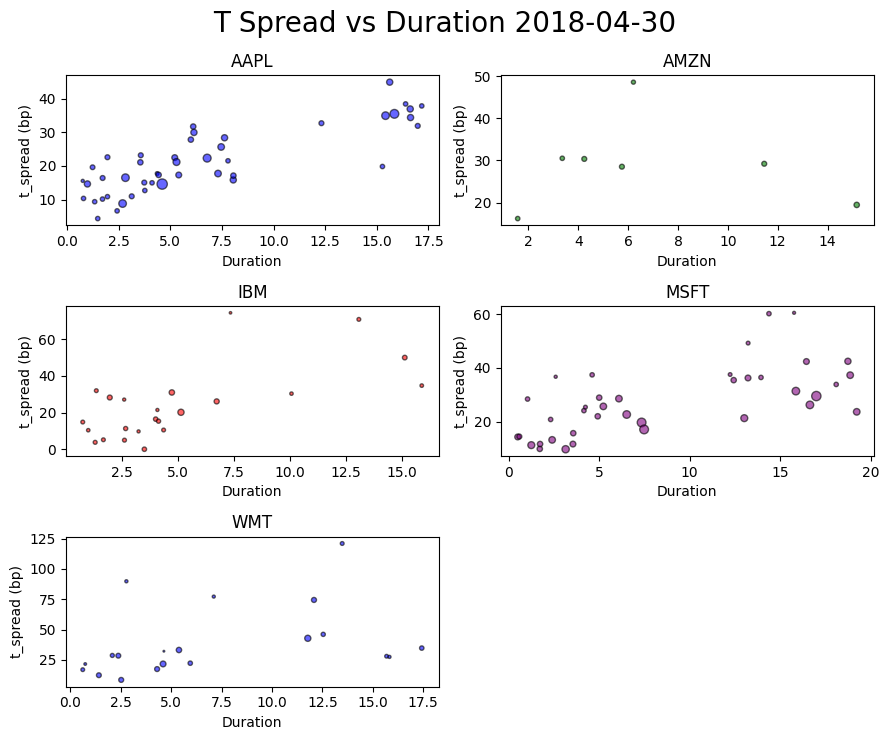

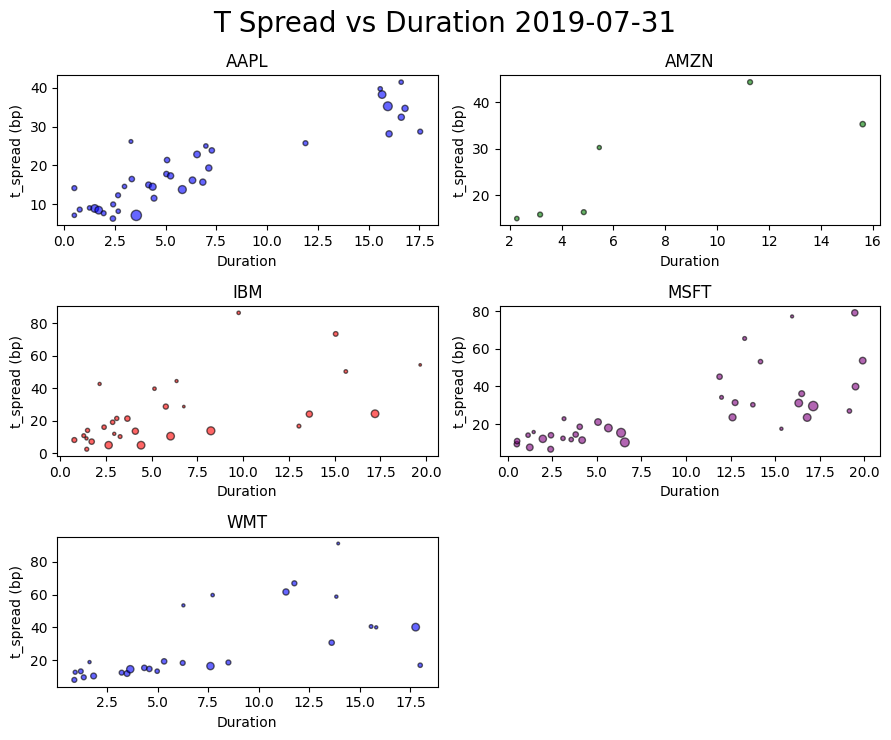

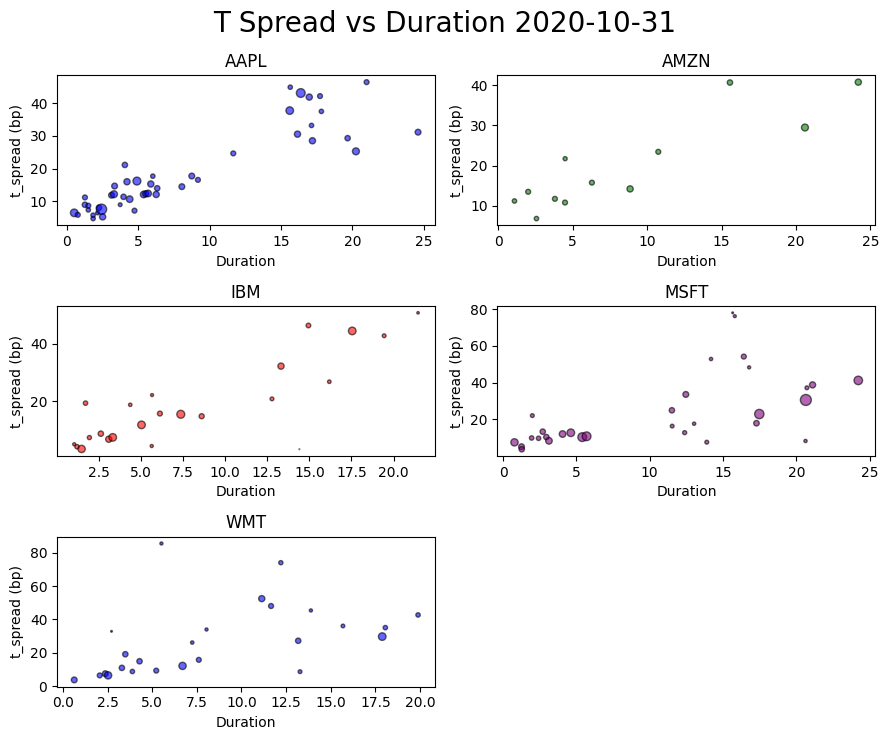

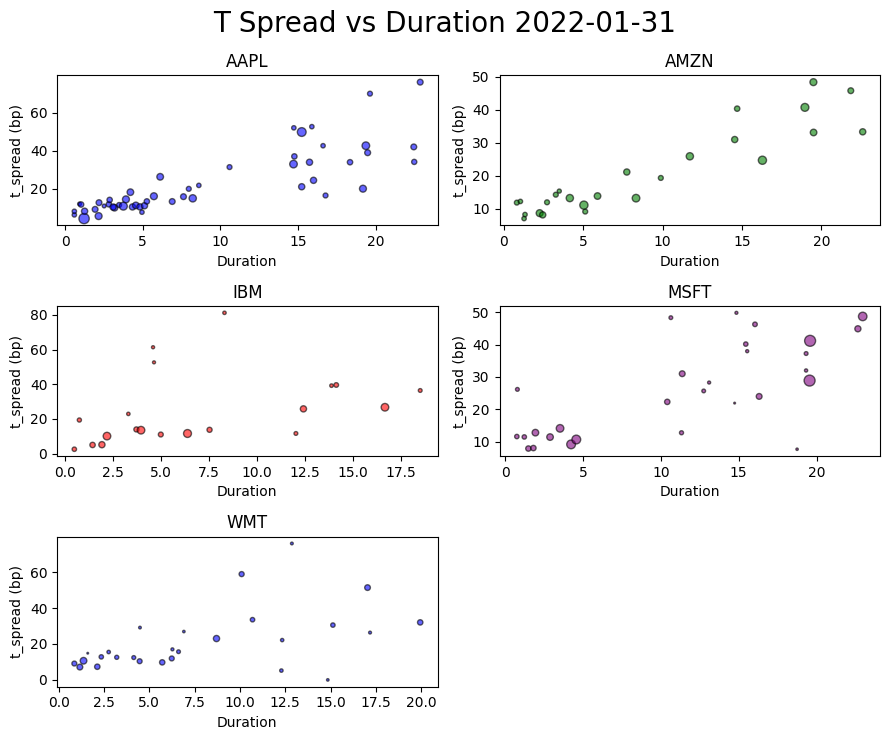

In [3]:
#plot the T-spread vs Duration on selected dates
random_dates = spread_curve.bond_data.date.unique()[::15]

for d in random_dates:
    spread_curve.t_spread_plots(d)

In [4]:
spread_curve.fit('amount_outstanding')

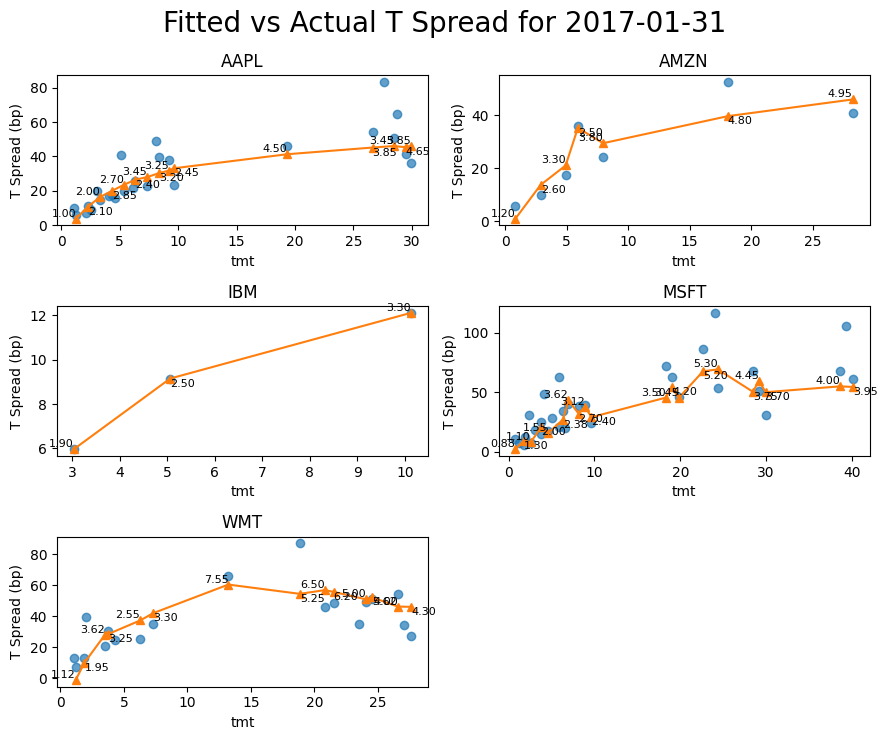

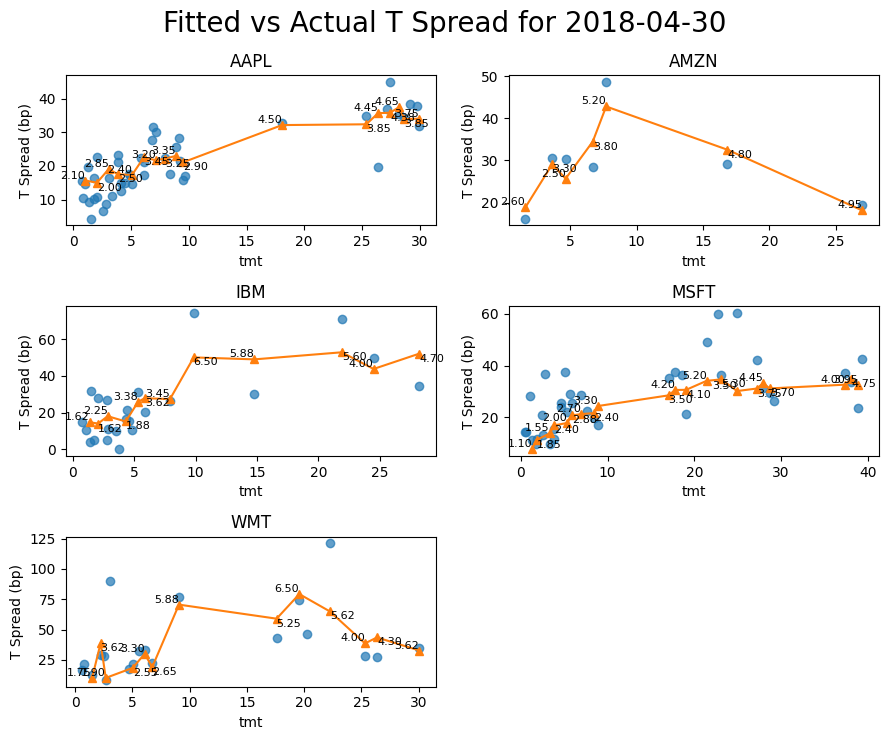

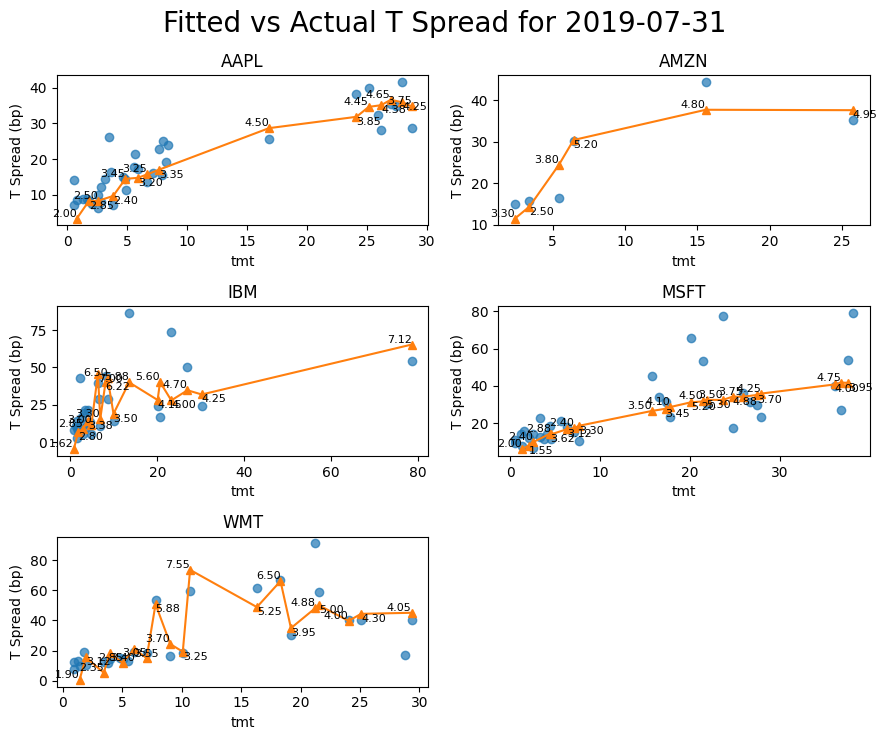

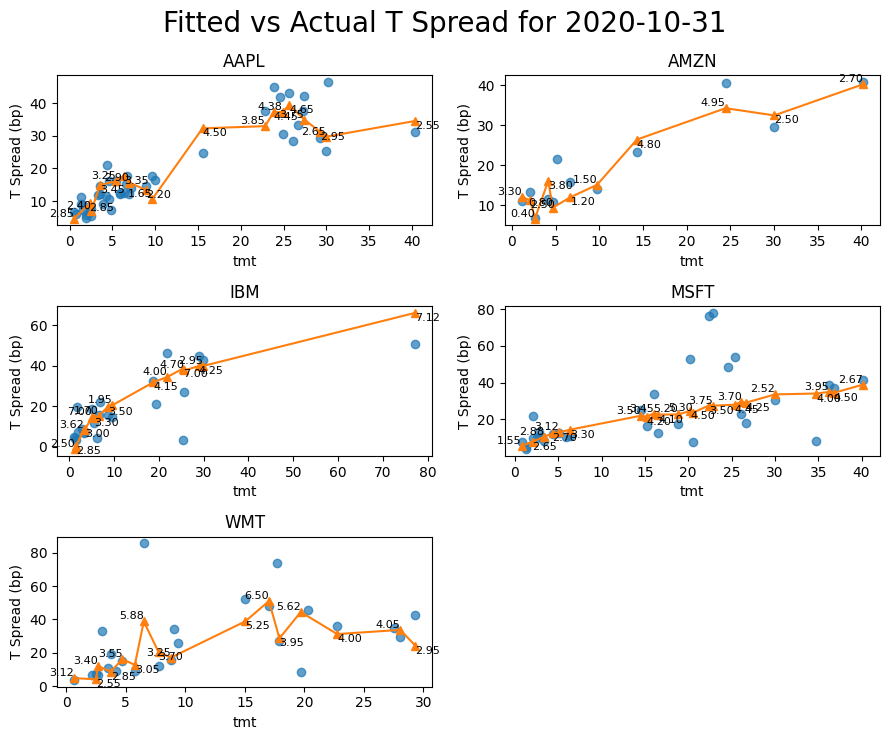

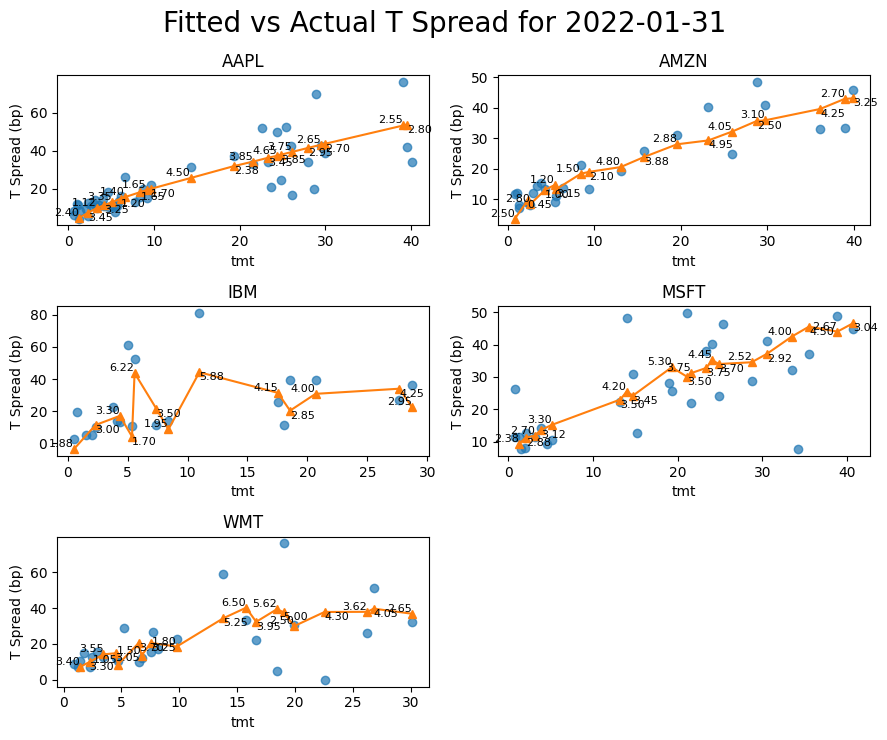

In [5]:
for d in random_dates:
    spread_curve.plot_fitted_vs_actual(d)

,company,annualized_return,annualized_volatility,sharpe_ratio,turnover
0,AAPL,0.199864,0.149417,1.337630,0.050197
1,AMZN,0.091591,0.190074,0.481870,0.059757
2,IBM,0.296693,0.470517,0.630569,0.136065
3,MSFT,-0.180051,0.425147,-0.423503,0.116378
4,WMT,0.161947,0.686001,0.236074,0.198940


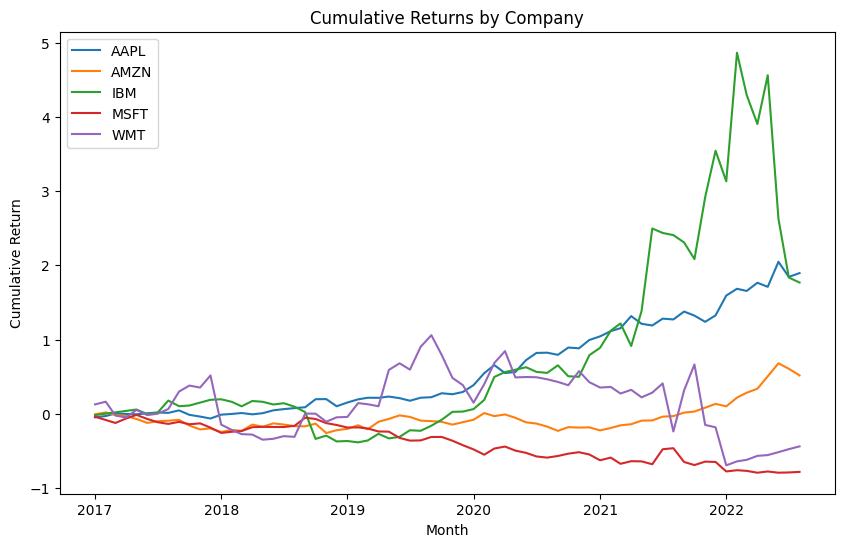

In [6]:
bond_data = spread_curve.bond_data[['date', 'isin', 'company_symbol', 'duration', 'dirty_price', 't_spread_fitted', 't_spread']].copy()
bond_data.eval('t_spread_resid = t_spread- t_spread_fitted', inplace=True)

# Instantiate the class with the bond data
strategy = Strategy(bond_data, 20)

# Run the strategy
strategy.run_strategy('equal')

# Calculate the performance metrics
performance_metrics = strategy.calculate_performance() 

display(performance_metrics)

# Plot cumulative returns for each company
strategy.plot_performance() 


,company,annualized_return,annualized_volatility,sharpe_ratio,turnover
0,AAPL,0.199864,0.149417,1.337630,0.050197
1,AMZN,0.091591,0.190074,0.481870,0.059757
2,IBM,0.296693,0.470517,0.630569,0.136065
3,MSFT,-0.180051,0.425147,-0.423503,0.116378
4,WMT,0.161947,0.686001,0.236074,0.198940


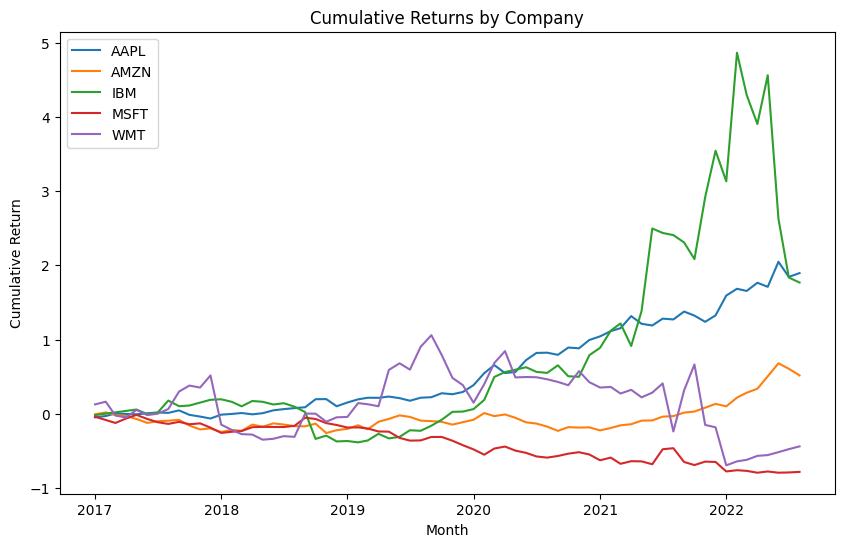

In [7]:
bond_data = spread_curve.bond_data[['date', 'isin', 'company_symbol', 'duration', 'dirty_price', 't_spread_fitted', 't_spread']].copy()
bond_data.eval('t_spread_resid = t_spread- t_spread_fitted', inplace=True)

# Instantiate the class with the bond data
strategy = Strategy(bond_data, 20)

# Run the strategy
strategy.run_strategy('duration_based')

# Calculate the performance metrics
performance_metrics = strategy.calculate_performance() 

display(performance_metrics)

# Plot cumulative returns for each company
strategy.plot_performance() 
